In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


In [3]:
import numpy as np

class make_regression:
    
    def __init__(self):
        self.model_params = None
        self.num_feats = None
        self.random_state = None
        self.is_clean = None
        self.noise = None
        self.bias = None
        
    def build_dataset(self, num_feat=10, num_rows=100, random_state = None, num_important=10, 
                      noise=0.1, bias=None, dirty_data=False):
        assert num_feat > 0 and num_rows > 0, "Must have rows and features > 0."
        if random_state:
            np.random.seed(random_state)
            self.random_state = random_state

        means = np.random.uniform(-1,1, size=num_feat)
        sigmas = np.random.uniform(1e-6,1, size=num_feat)
        X = np.zeros((num_rows, num_feat))
        for i, mu in enumerate(means):
            X.T[i] = np.random.normal(mu, sigmas[i], num_rows)

        if bias == True:
            bias = np.random.uniform(-1,1)
        elif isinstance(bias, float):
            pass
        else:
            bias = 0.
        
        self.bias = bias

        if num_important > num_feat:
            num_important = num_feat
            
        self.num_important = num_important
        self.num_feats = num_feat

        target_builder = np.random.choice(np.arange(num_feat),num_important, replace=False)
        X_target = X.T[target_builder].T
        betas = np.random.uniform(-1,1,num_important)
        params = []
        for i,j in zip(betas, target_builder):
            params.append((j,i))
        self.model_params = params
        
        y = np.sum(X_target*betas, axis=1) + bias + np.random.normal(0, noise, num_rows)
        
        if dirty_data:
            X = self.muck_up_data(X)
            
        return X, y
    
    def muck_up_data(self, X, dup_cols=True, add_nan=True):
        if dup_cols:
            X = self.add_duplicate_columns(X)
        if add_nan:
            X = self.add_nans(X, add_nan)
        return X
    
    def add_duplicate_columns(self,X):
        cols_to_dup = np.random.choice(np.arange(self.num_feats), np.random.randint(1,self.num_feats), replace=False)
        new_X = np.hstack((X, X.T[cols_to_dup].T.reshape(-1,len(cols_to_dup))))
        return new_X
            
    def add_nans(self, X, add_nan_val):
        
        if isinstance(add_nan_val, float):
            num_of_nans = int(add_nan_val*X.size)   
        elif isinstance(add_nan_val, int):
            num_of_nans = add_nan_val
        else:
            max_nans = int(0.1*X.size)
            num_of_nans = np.random.randint(1,max_nans)
            
        for _ in range(num_of_nans):
            i = np.random.randint(0,X.shape[0])
            j = np.random.randint(0,X.shape[1])
            X[i,j] = np.nan
        return X

In [4]:
mr = make_regression()
X,y = mr.build_dataset(num_important=1, num_rows=100, num_feat=1, bias=True)

In [5]:
print(mr.model_params, mr.bias)

[(0, -0.31386054778597972)] 0.290536517758325


In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y.reshape(-1,1))
pred = lr.predict(X)

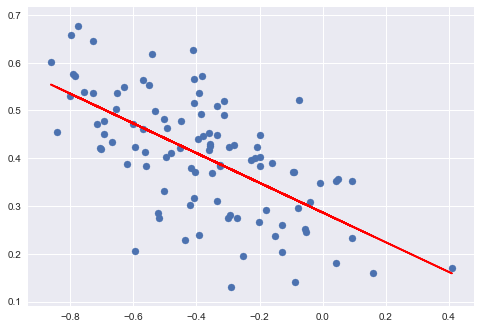

In [7]:
plt.scatter(X[:,0],y)
plt.plot(X[:,0],pred,'r');

In [8]:
mr = make_regression()
X,y = mr.build_dataset(num_important=3, num_rows=100, num_feat=10, bias=True)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y.reshape(-1,1))
pred = lr.predict(X)

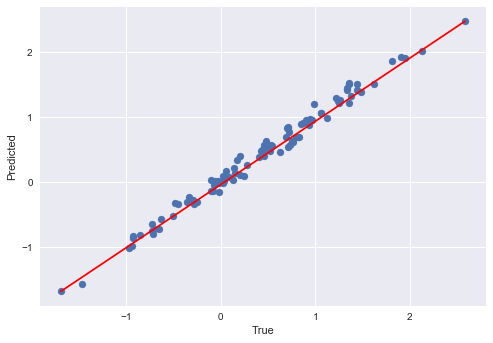

In [10]:
plt.scatter(y, pred)
plt.xlabel("True")
plt.ylabel("Predicted");
plt.plot([min(y),max(y)],[min(pred),max(pred)],'r');

# Now let's add some messiness to the data

In [11]:
mr2 = make_regression()
X,y = mr2.build_dataset(num_feat=5)

In [12]:
pd.DataFrame(mr2.muck_up_data(X, add_nan=False)).head()

,0,1,2,3,4,5
0,1.263979,0.651241,-0.561633,-0.801106,0.578425,0.651241
1,0.121180,0.267346,-0.497869,-0.802510,-0.215426,0.267346
2,0.710957,0.663273,-0.187195,-0.801178,0.434183,0.663273
3,0.040662,0.202650,-0.498714,-0.807440,-0.179597,0.202650
4,0.827405,0.648789,-0.308104,-0.802076,0.374624,0.648789


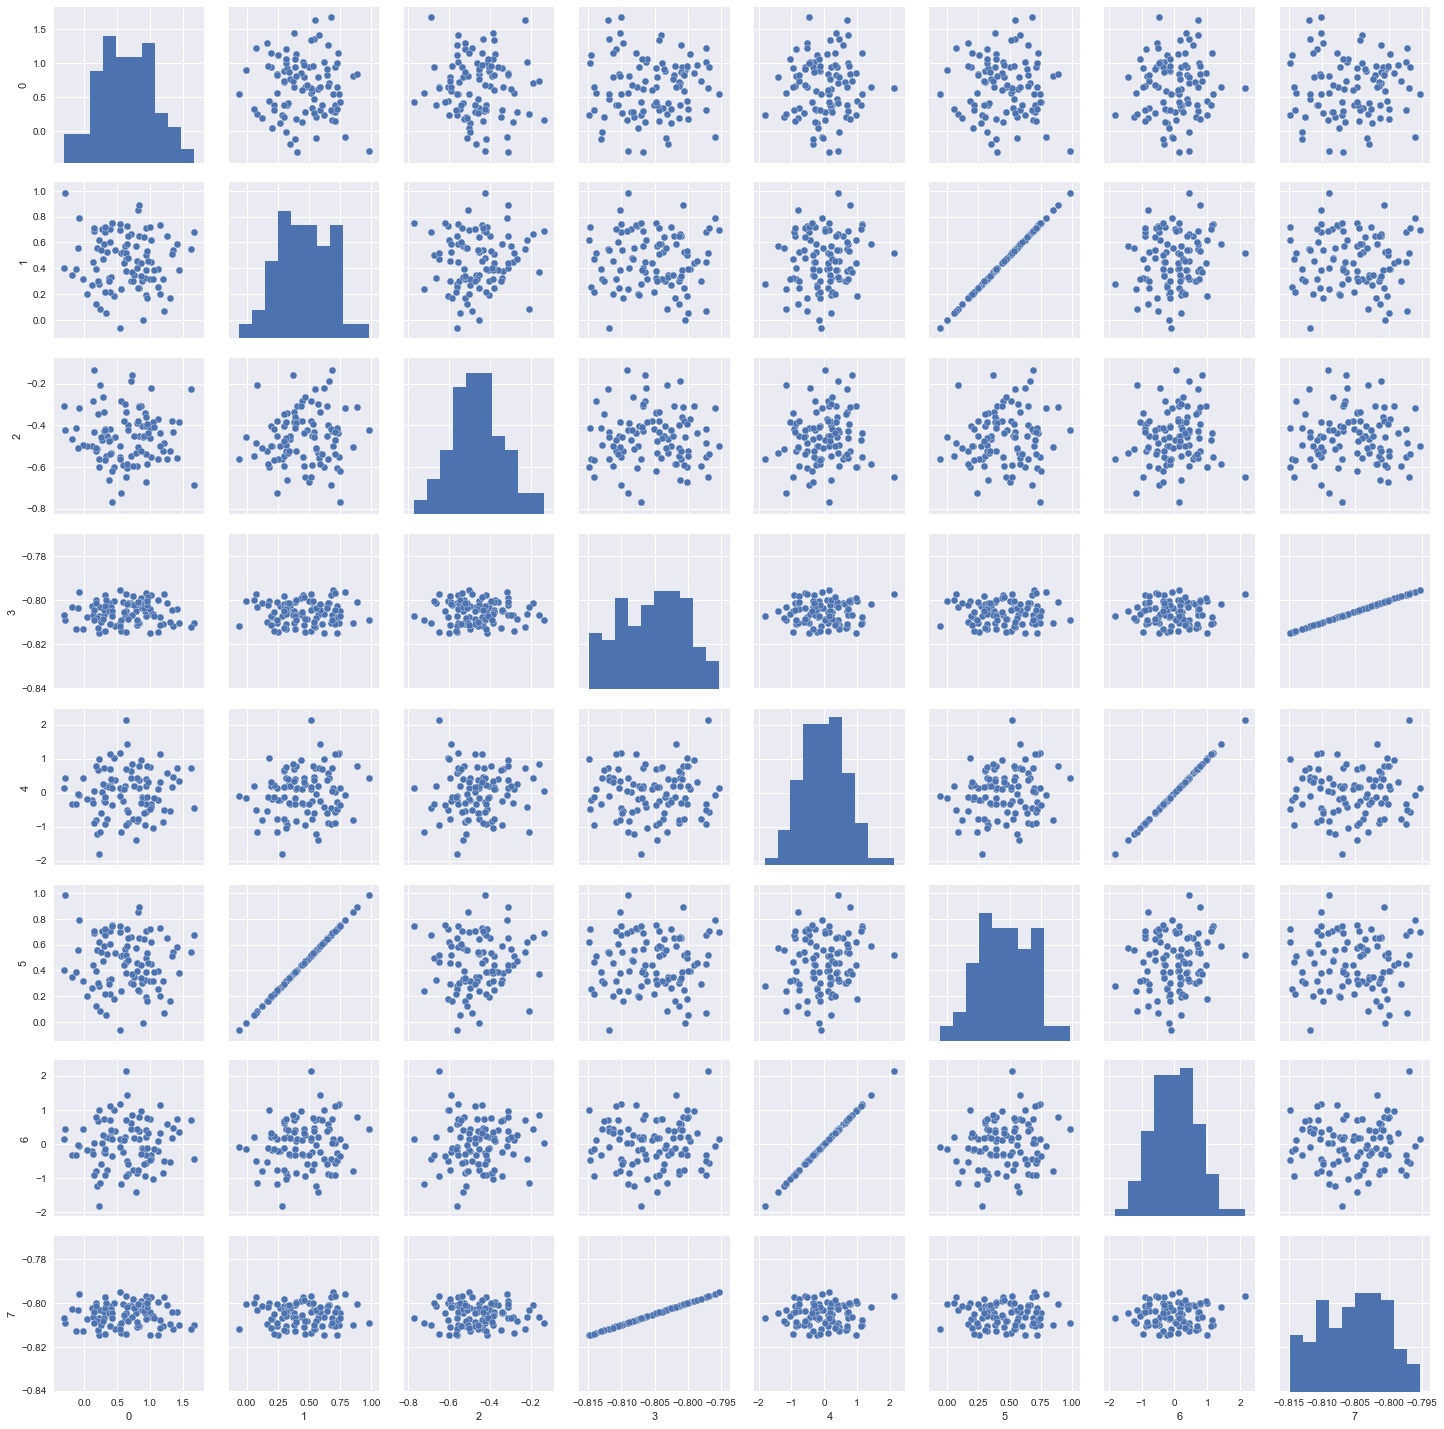

In [13]:
import seaborn as sns
sns.pairplot(pd.DataFrame(mr2.muck_up_data(X, add_nan=False)));

In [14]:
with_nan = mr2.muck_up_data(X)

In [16]:
pd.DataFrame(mr2.muck_up_data(X, add_nan=0.4)).head()

,0,1,2,3,4,5,6
0,NaN,0.651241,NaN,NaN,0.578425,0.651241,NaN
1,0.121180,NaN,NaN,-0.802510,NaN,0.267346,-0.497869
2,NaN,0.663273,-0.187195,-0.801178,0.434183,0.663273,NaN
3,NaN,0.202650,-0.498714,-0.807440,-0.179597,0.202650,-0.498714
4,0.827405,0.648789,-0.308104,-0.802076,NaN,0.648789,-0.308104
